In [1]:
# Import packages and function
import pandas as pd
import polars as pl
from ppclib import * 

In [2]:
# Fetch PPC data from CIM api
start_date_str = "2025-05-02" # format "YYYY-MM-DD"
daysback = 7
ppc_file_list = fetch_ppc_days_back(start_date_str,daysback)

Skipping 2025-05-02 (file already exists)
Skipping 2025-05-01 (file already exists)
Skipping 2025-04-30 (file already exists)
Skipping 2025-04-29 (file already exists)
Skipping 2025-04-28 (file already exists)
Skipping 2025-04-27 (file already exists)
Skipping 2025-04-26 (file already exists)


In [3]:
ppc_file_list[0]

'D:/ppc_saw/myfolder/2025-05-02.xlsx'

In [4]:
# Get list of EquipID and Recipe of the "start_date_str"
df = pl.read_excel(ppc_file_list[0])
recipe = df['Recipe'].unique()
equipid = df['EquipID'].unique()
equipid = equipid.to_list()
recipe = recipe.to_list()

In [5]:
# Import Data Profile Excel file name 'ProcessParasProfileUTL'
df4 = get_data_profile()

In [6]:
# Consolidate all 'PPCDataUTL' Excel files in working folder to one Polar dataframe
df3 = combine_ppc_dataframe(ppc_file_list)

Appended: D:/ppc_saw/myfolder/2025-05-02.xlsx done.
Schema([('EquipOpn', String), ('EquipID', String), ('ULotID', String), ('Recipe', String), ('Parameter', String), ('CreateTime', Datetime(time_unit='ms', time_zone=None)), ('EventID', String), ('EventDesc', String), ('SAW_ProductionStock_Z1', String), ('BladeOD_Z1', String), ('BladeThickness_Z1', String), ('FlangeODType_Z1', String), ('SAW_ProductionStock_Z2', String), ('BladeOD_Z2', String), ('BladeThickness_Z2', String), ('FlangeODType_Z2', String)])
Appended: D:/ppc_saw/myfolder/2025-05-01.xlsx done.
Schema([('EquipOpn', String), ('EquipID', String), ('ULotID', String), ('Recipe', String), ('Parameter', String), ('CreateTime', Datetime(time_unit='ms', time_zone=None)), ('EventID', String), ('EventDesc', String), ('SAW_ProductionStock_Z1', String), ('BladeOD_Z1', String), ('BladeThickness_Z1', String), ('FlangeODType_Z1', String), ('SAW_ProductionStock_Z2', String), ('BladeOD_Z2', String), ('BladeThickness_Z2', String), ('FlangeODTy

In [7]:
# Extract the parameters string from the 'parameter' column df3 to SVID and ECID dataframe
df3,SVID,ECID = param_spliting(df3)

Processing rows: 1500678it [00:35, 42012.31it/s]


In [8]:
# Memory release 
svid_rows = []
ecid_rows = []

In [9]:
# Join df3, SVID and ECID dataframe and combine to result polar dataframe
result = combine(df3,SVID,ECID)

Number of rows: 8228   Recipe: SL60692P_N


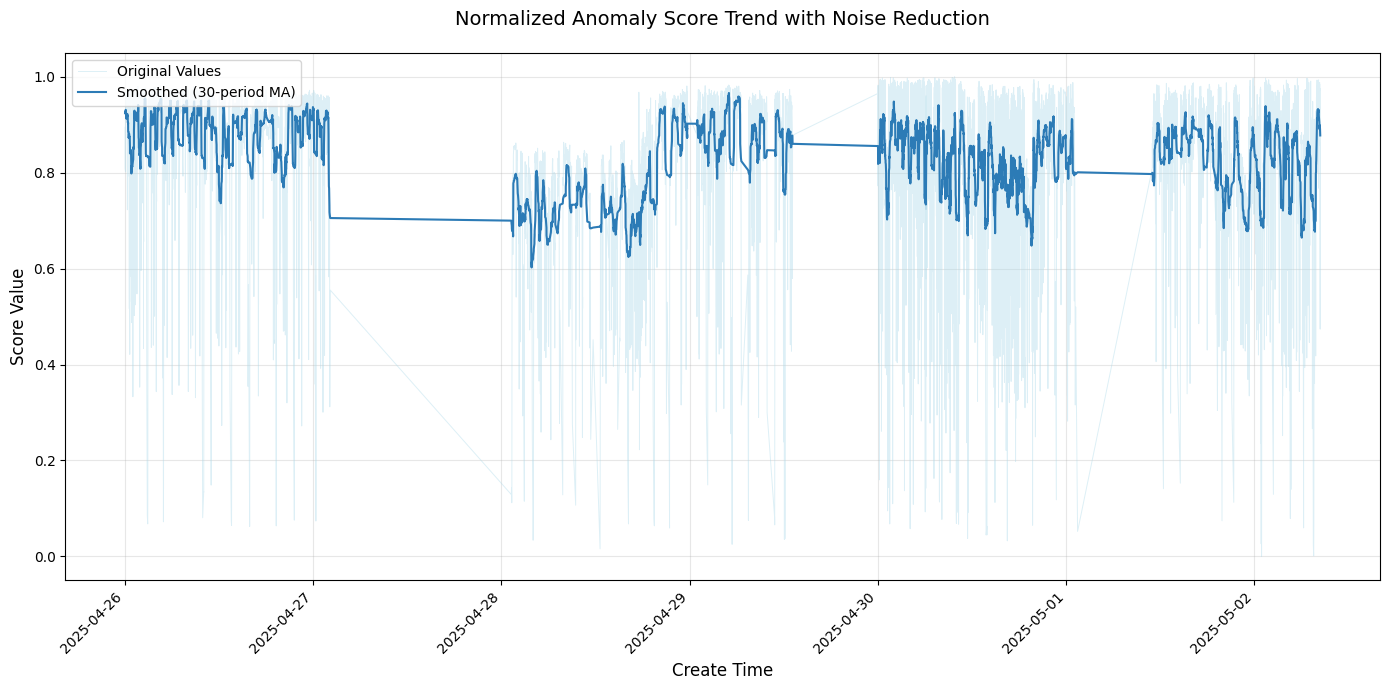

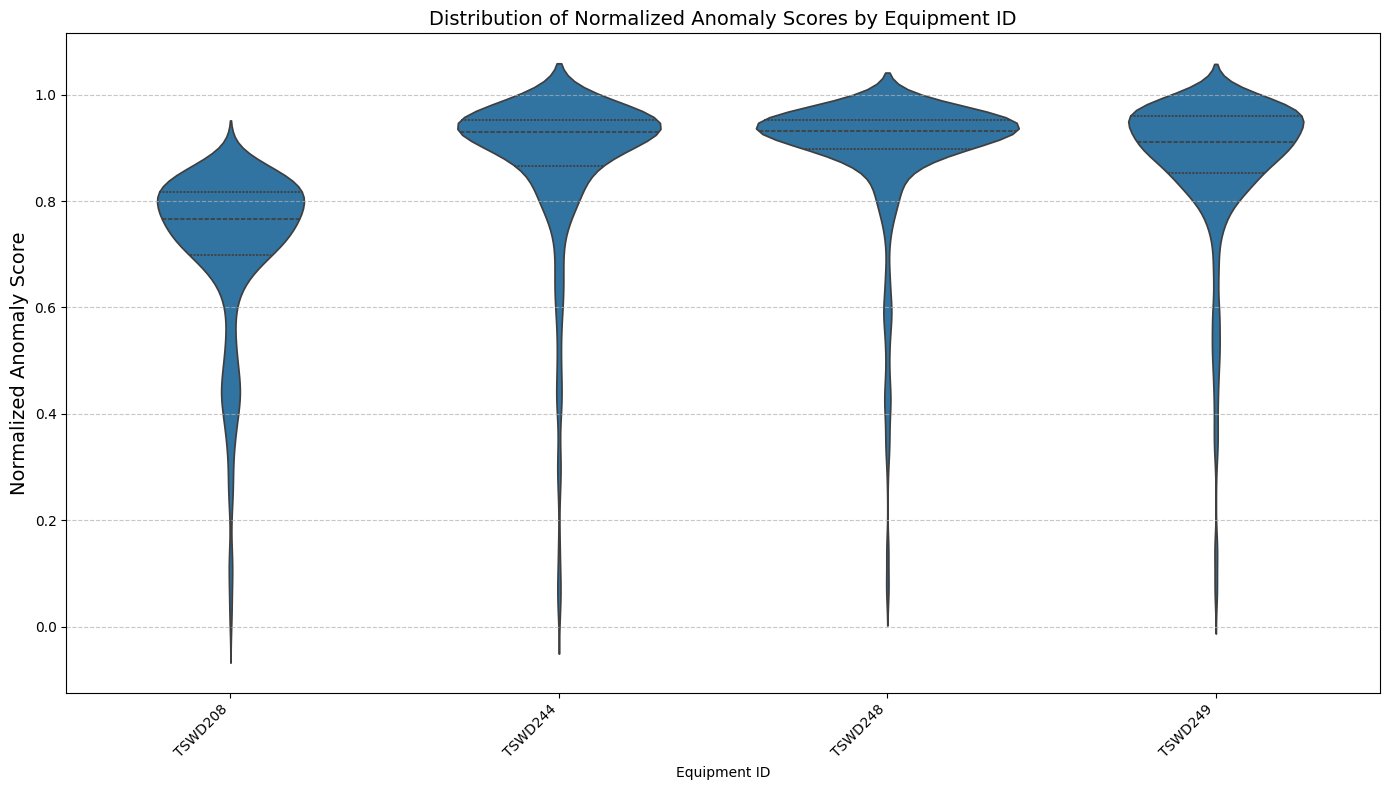

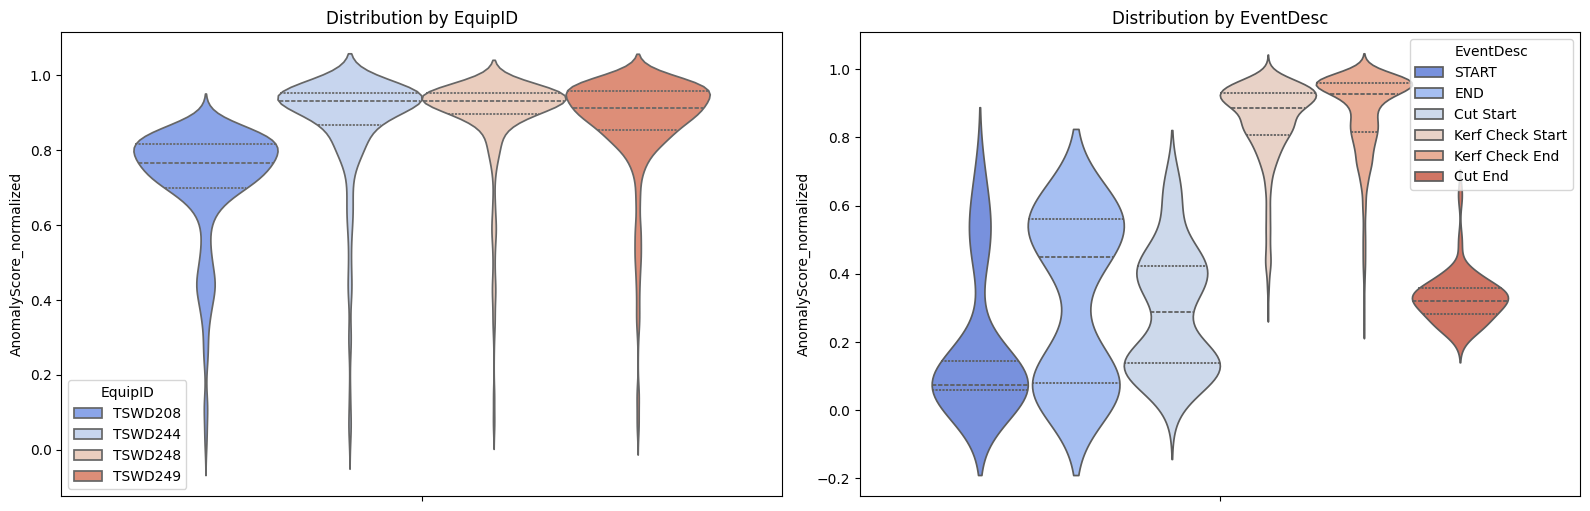

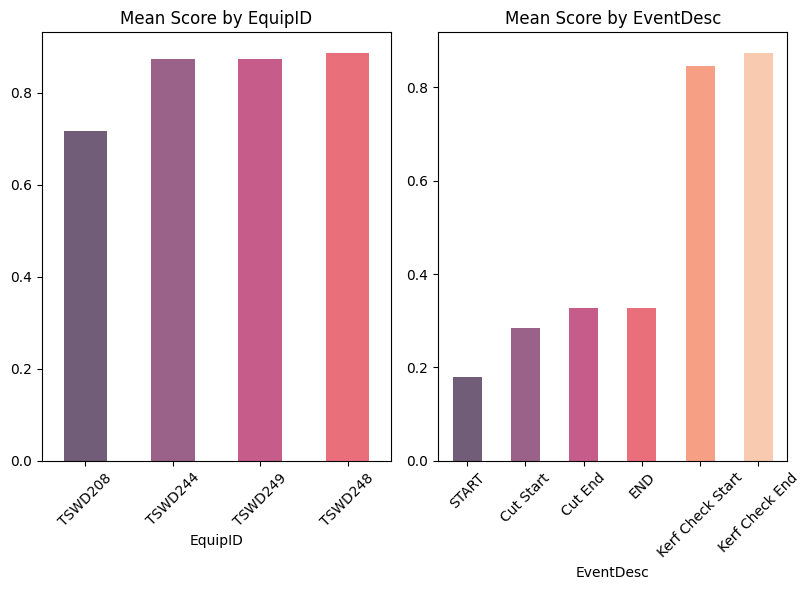

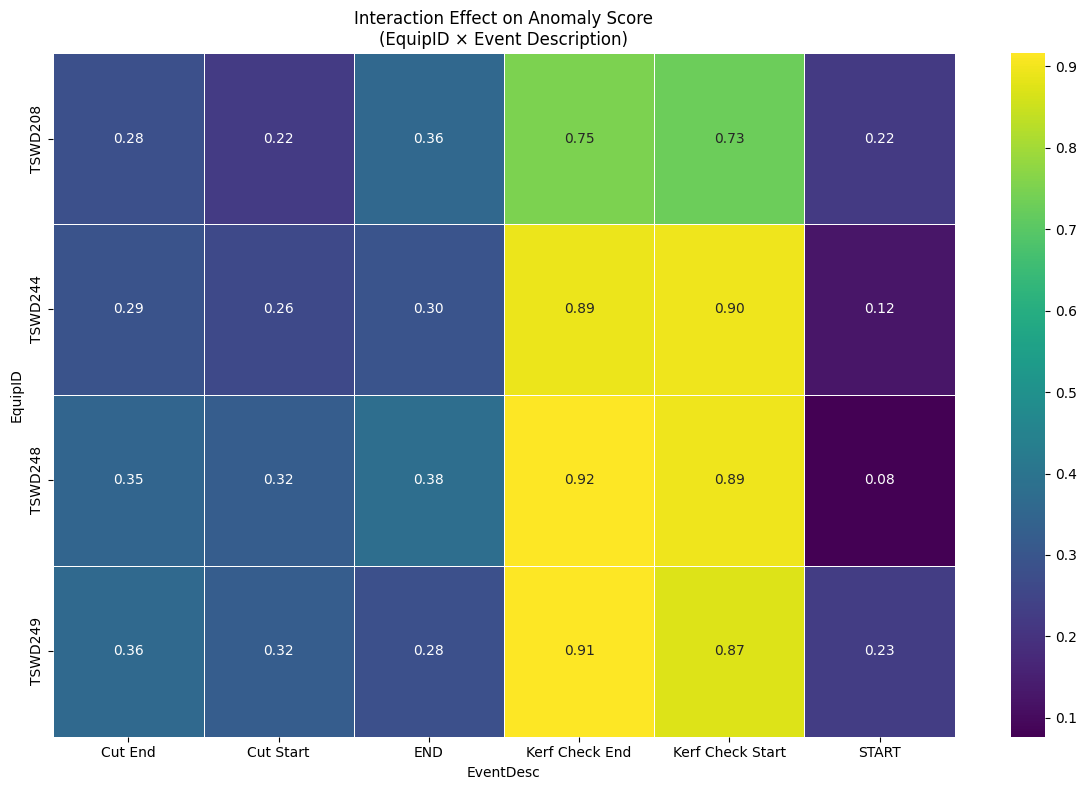

In [10]:
# Looping Anomaly Detection by 'Recipe' of 'start_date_str'
x = recipe[131]

# Filter rows where age > 30
filtered_df = result[result['Recipe'] == x]

# Anormaly Analysis on cleaned dataframe
anomalies_df = anamoly_det(filtered_df)

# Number of Rows to do Anomaly 
print ("Number of rows: "+ str(len(anomalies_df) )+ "   Recipe: " + x)

# Save anomaly result to csv file.
anomalies_df.to_csv('anomaly_output.csv', index=False)

# SESSION VISUALIZATION PLOT
# Select the columns of interest
cols_to_analyze = ['EquipID' ,'EventDesc']
plot_trend(anomalies_df)
plot_equipid_violin(anomalies_df)
plot_violin_catagories(anomalies_df,cols_to_analyze)
plot_mean_bars_catagoies(anomalies_df,cols_to_analyze)
plot_heatmap(anomalies_df)

In [11]:
len(result)

676201